In [1]:
from tf_pwa.config_loader import ConfigLoader
from tf_pwa.amp.core import Particle
import extra_amp
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt
from tf_pwa.cal_angle import cal_helicity_angle

2025-11-06 17:02:43.224493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-06 17:02:43.224723: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-06 17:02:43.352604: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-06 17:02:47.829743: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

No module named 'uproot' you should install `uproot` correctly for using this module


In [3]:
con = ConfigLoader("config_a.yml")
con.set_params("final_params.json")
p4_val = con.generate_phsp_p(1)
data_val = con.data.cal_angle(p4_val)

/home/akazatsky/Desktop/CompProject/New/B2DxDK/tf-pwa/tf_pwa/config_loader/config_loader.py:1035: UserWarning: Neglect ['X(3872)_mass', 'X(3872)_width', 'chi(c2)(3930)_mass', 'chi(c2)(3930)_width', 'Psi(4040)_mass', 'Psi(4040)_width', 'X0(2900)_mass', 'X0(2900)_width', 'X1(2900)_mass', 'X1(2900)_width'] when setting params.
  warnings.warn(


In [5]:
p4_val_list = list(p4_val.keys())
print(p4_val_list)
D = p4_val_list[0]
D0 = p4_val_list[1]
K = p4_val_list[2]
pi = p4_val_list[3]

print(p4_val[D])
print(p4_val)

[D, D0, K, pi]
tf.Tensor([[ 2.16794125 -0.12412115  0.96186944 -0.51359445]], shape=(1, 4), dtype=float64)
{D: <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[ 2.16794125, -0.12412115,  0.96186944, -0.51359445]])>, D0: <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[ 2.29183652, -0.0138338 , -1.28627144,  0.34675371]])>, K: <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[0.66602529, 0.15716188, 0.38533446, 0.16337135]])>, pi: <tf.Tensor: shape=(1, 4), dtype=float64, numpy=array([[ 0.15353697, -0.01920693, -0.06093246,  0.0034694 ]])>}


In [127]:
print(data_val["particle"].keys())

data_val_list = list(data_val["particle"])

# 0=B , 1=K , 2=D , 3=D0 , 4=pi    wrong!

# [1, [2, [3, 4]]]   [K, [D, [D0, pi]]]

p_B = data_val["particle"][data_val_list[8]]["p"].numpy().flatten()
p_K = data_val["particle"][data_val_list[6]]["p"].numpy().flatten()
p_X = data_val["particle"][data_val_list[5]]["p"].numpy().flatten()
p_D = data_val["particle"][data_val_list[0]]["p"].numpy().flatten()
p_Dst = data_val["particle"][data_val_list[7]]["p"].numpy().flatten()
p_D0 = data_val["particle"][data_val_list[3]]["p"].numpy().flatten()
p_pi = data_val["particle"][data_val_list[2]]["p"].numpy().flatten()

print(p_X)
print(p_K+p_X)
print(p_B)

print(data_val.get_angle(decay_list[1], data_val_list[2]))

dict_keys([D, (D, K), pi, D0, (D0, K, pi), (D, D0, pi), K, (D0, pi), Bp])
[ 4.42713254 -0.36333084  0.58279868 -0.10429287]
[ 5.27934002e+00 -5.74163495e-11 -4.09560497e-10 -3.11475845e-12]
[ 5.27934002e+00 -5.74163338e-11 -4.09560511e-10 -3.11475151e-12]
{'beta': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.11698447])>, 'alpha': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([-1.48955399])>, 'gamma': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>}


In [162]:
decay_list = list(data_val["decay"])

print(decay_list)
print(decay_list[1])
print(decay_list[1][0].keys())

[[Bp->(D, K)+(D0, pi), (D, K)->D+K, (D0, pi)->D0+pi], [Bp->(D, D0, pi)+K, (D, D0, pi)->(D0, pi)+D, (D0, pi)->D0+pi], [Bp->(D0, K, pi)+D, (D0, K, pi)->(D0, pi)+K, (D0, pi)->D0+pi]]
[Bp->(D, D0, pi)+K, (D, D0, pi)->(D0, pi)+D, (D0, pi)->D0+pi]


AttributeError: 'BaseDecay' object has no attribute 'keys'

In [163]:
decay_list = list(con.data.cal_angle(p4_val)["decay"].keys())

print(decay_list[1])

print(con.data.cal_angle(p4_val)["decay"][decay_list[1]][decay_list[1][0]])

[Bp->(D, D0, pi)+K, (D, D0, pi)->(D0, pi)+D, (D0, pi)->D0+pi]
{'|q|2': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.48254061])>, K: {'ang': {'beta': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.42008951])>, 'alpha': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([-1.01333092])>, 'gamma': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>}}, (D, D0, pi): {'ang': {'beta': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.72150315])>, 'alpha': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.12826173])>, 'gamma': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>}}}


In [ ]:
print(data_val["decay"].keys())
data_val_1 = data_val["decay"]
data_val_1_list = list(data_val_1.keys())

print(data_val_1[data_val_1_list[1]].keys())
data_val_2 = data_val_1[data_val_1_list[1]]
data_val_2_list = list(data_val_2.keys())

print(data_val_2[data_val_2_list[1]].keys())
data_val_3 = data_val_2[data_val_2_list[1]]
data_val_3_list = list(data_val_3.keys())

theta_234_1 = data_val_3[data_val_3_list[2]]["ang"]["beta"].numpy().flatten()
phi_234_1 = data_val_3[data_val_3_list[2]]["ang"]["alpha"].numpy().flatten()



data_keys_decay = list(data_val["decay"].keys())
data_keys_decay[0].append(list(data_val["decay"][data_keys_decay[0]].keys()))

dict_keys([[Bp->(D, K)+(D0, pi), (D, K)->D+K, (D0, pi)->D0+pi], [Bp->(D, D0, pi)+K, (D, D0, pi)->(D0, pi)+D, (D0, pi)->D0+pi], [Bp->(D0, K, pi)+D, (D0, K, pi)->(D0, pi)+K, (D0, pi)->D0+pi]])
dict_keys([(D, D0, pi)->(D0, pi)+D, Bp->(D, D0, pi)+K, (D0, pi)->D0+pi])
dict_keys(['|q|2', K, (D, D0, pi)])


In [231]:
def convert_keys_to_strings_recursive(data):
    
    if not isinstance(data, dict):
        return data

    new_dict = {}
    for key, value in data.items():
        new_key = str(key)

        if isinstance(value, dict):
            new_value = convert_keys_to_strings_recursive(value)
        else:
            new_value = value

        new_dict[new_key] = new_value

    return new_dict

In [239]:
data_val_str = convert_keys_to_strings_recursive(data_val)

print(data_val_str["decay"]["[Bp->(D, D0, pi)+K, (D, D0, pi)->(D0, pi)+D, (D0, pi)->D0+pi]"]["Bp->(D, D0, pi)+K"]["(D, D0, pi)"]["ang"].keys())

dict_keys(['beta', 'alpha', 'gamma'])


In [6]:
# Loading config files
config = ConfigLoader("config_a.yml")
config.set_params("final_params.json")

# Sampling four-vectors
p4 = config.generate_phsp_p(1000000) # <-- number of sampled four-vectors
data = config.data.cal_angle(p4)
data["c"] = -np.ones((1000000,))

In [7]:
p4_2 = config.generate_phsp_p(1000000) # <-- number of sampled four-vectors
data_2 = config.data.cal_angle(p4_2)
data_2["c"] = np.ones((1000000,))

In [17]:
paper = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] # [0, 1, 3, 4, 7, 8, 12, 15, 18, 19, 20, 21, 22, 23, 24, 25]

res_names = ["X(3872)","X(3915)(0-)","chi(c2)(3930)","X(3940)(1+)","X(3993)","Psi(4040)","X(4300)","NR(0-)SPp","NR(1+)PSp","NR(0-)SPm","NR(1-)PPm","X0(2900)","X1(2900)"]

In [9]:
# Included resonance number(s)
R = paper # [0]: X(3872), [1]: X(3915), [2]: chi(c2)(3930), ..., [0,1]: X(3872) and X(3915), ...

# Modifying model
amp_model = config.get_amplitude()
dg = amp_model.decay_group
dg.set_used_chains(R)

# Executing amplitude calculation
amps = dg.get_amp(data).numpy()

# Which decays
for i in R:
    print(dg[i])
print()

# Which end products
print(p4.keys())

[Bp->X(3872)+K, X(3872)->Dst+D, Dst->D0+pi]
[Bp->X(3915)(0-)+K, X(3915)(0-)->Dst+D, Dst->D0+pi]
[Bp->chi(c2)(3930)+K, chi(c2)(3930)->Dst+D, Dst->D0+pi]
[Bp->X(3940)(1+)+K, X(3940)(1+)->Dst+D, Dst->D0+pi]
[Bp->X(3993)+K, X(3993)->Dst+D, Dst->D0+pi]
[Bp->Psi(4040)+K, Psi(4040)->Dst+D, Dst->D0+pi]
[Bp->X(4300)+K, X(4300)->Dst+D, Dst->D0+pi]
[Bp->NR(0-)SPp+K, NR(0-)SPp->Dst+D, Dst->D0+pi]
[Bp->NR(1+)PSp+K, NR(1+)PSp->Dst+D, Dst->D0+pi]
[Bp->NR(0-)SPm+K, NR(0-)SPm->Dst+D, Dst->D0+pi]
[Bp->NR(1-)PPm+K, NR(1-)PPm->Dst+D, Dst->D0+pi]
[Bp->X0(2900)+Dst, X0(2900)->D+K, Dst->D0+pi]
[Bp->X1(2900)+Dst, X1(2900)->D+K, Dst->D0+pi]

dict_keys([D, D0, K, pi])


In [10]:
# Filling JSON file with amplitudes
all_amps = []

for i in range(len(dg.chains)):
    amp_model = config.get_amplitude()
    dg = amp_model.decay_group

    dg.set_used_chains([i])

    amps = dg.get_amp(data).numpy().flatten()

    amps_sep = []
    for j in amps:
        amps_sep.append([float(j.real), float(j.imag)])

    all_amps.append(amps_sep)

with open('all_amps.json', 'w') as f:
    json.dump(all_amps, f, indent=2)

In [11]:
# Simulating individual and combined complex amplitudes
ind_amps = []

for i in range(len(dg.chains)):
    amp_model = config.get_amplitude()
    dg = amp_model.decay_group
    

    dg.set_used_chains([i])

    amps = dg.get_amp(data).numpy().flatten()

    ind_amps.append(amps)



amp_model = config.get_amplitude()
dg = amp_model.decay_group
dg.set_used_chains(paper)

tot_amps = dg.get_amp(data).numpy().flatten()

In [12]:
# Simulating individual and combined complex amplitudes
ind_amps_2 = []

for i in range(len(dg.chains)):
    amp_model_2 = config.get_amplitude()
    dg_2 = amp_model_2.decay_group

    dg_2.set_used_chains([i])

    amps_2 = dg_2.get_amp(data_2).numpy().flatten()

    ind_amps_2.append(amps_2)

amp_model_2 = config.get_amplitude()
dg_2 = amp_model_2.decay_group
dg_2.set_used_chains(paper)

tot_amps_2 = dg_2.get_amp(data_2).numpy().flatten()

In [13]:
x_tot_DstD_r = [3.878130783466996, 3.895712523133868, 3.913880320789636, 3.9326341764343, 3.9502159161011723, 3.9683837137569404, 3.987137569401604, 4.004133251079581, 4.024059222702036, 4.039882788402221, 4.059808760024676, 4.076804441702652, 4.0949722393584205, 4.113140037014189, 4.1301357186921654, 4.148889574336829, 4.168229487970389, 4.1852251696483656, 4.2022208513263415, 4.22038864898211, 4.2391425046267734, 4.25613818630475, 4.273719925971623, 4.293059839605182, 4.310641579272055, 4.329395434916718, 4.348149290561381, 4.363972856261567, 4.381554595928439, 4.399722393584208, 4.417890191239975, 4.4384022208513265, 4.45305367057372, 4.471807526218384, 4.491147439851943, 4.506971005552129, 4.5239666872301045, 4.544478716841456, 4.561474398519432, 4.581986428130783, 4.600154225786551, 4.615391733497841, 4.635903763109192, 4.6528994447871685, 4.67048118445404, 4.6898210980876005, 4.706230721776681, 4.723812461443553, 4.744324491054904, 4.759561998766194, 4.779487970388649]
y_tot_DstD_r = [16.476683937823832, 40.259067357512954, 35.44041450777202, 40.10362694300518, 35.751295336787564, 41.347150259067355, 51.917098445595855, 61.398963730569946, 58.29015544041451, 55.95854922279793, 50.05181347150259, 44.145077720207254, 38.54922279792746, 36.99481865284974, 36.373056994818654, 34.196891191709845, 32.953367875647665, 32.33160621761658, 32.17616580310881, 34.04145077720207, 34.196891191709845, 34.04145077720207, 37.15025906735751, 43.36787564766839, 50.20725388601036, 48.18652849740933, 46.16580310880829, 41.81347150259067, 41.03626943005181, 38.23834196891192, 38.704663212435236, 36.52849740932643, 36.21761658031088, 34.66321243523316, 34.04145077720207, 34.9740932642487, 33.10880829015544, 30.77720207253886, 29.533678756476682, 26.735751295336787, 26.1139896373057, 23.471502590673573, 21.761658031088082, 20.673575129533678, 18.186528497409327, 17.253886010362695, 14.922279792746114, 13.367875647668393, 10.414507772020725, 7.6165803108808285, 3.2642487046632125]

x_tot_DstD_l = [3.87806, 3.89618, 3.91431, 3.93126, 3.94997, 3.96809, 3.98563, 4.00375, 4.02188, 4.03942, 4.05637, 4.07566, 4.09145, 4.11191, 4.12886, 4.14698, 4.16628, 4.18382, 4.20135, 4.21948, 4.23818, 4.25689, 4.27385, 4.29197, 4.30951, 4.3288, 4.34575, 4.36446, 4.38317, 4.40071, 4.42, 4.43578, 4.45332, 4.47262, 4.49015, 4.50652, 4.52406, 4.54218, 4.56323, 4.58018, 4.59714, 4.61643, 4.63222, 4.65209, 4.66963, 4.68775, 4.70412, 4.724, 4.74095, 4.75966, 4.77954]
y_tot_DstD_l = [17.87565, 63.26425, 69.79275, 87.20207, 86.42487, 91.08808, 97.3057, 94.04145, 78.65285, 59.06736, 46.47668, 39.01554, 34.04145, 30.7772, 30.62176, 30.93264, 30.31088, 31.39896, 31.24352, 32.48705, 33.10881, 34.50777, 35.7513, 34.19689, 31.24352, 26.58031, 25.49223, 26.58031, 27.97927, 28.91192, 29.06736, 28.91192, 29.53368, 30, 29.06736, 29.37824, 27.97927, 28.91192, 28.60104, 27.20207, 28.13472, 26.26943, 24.40415, 24.40415, 22.07254, 20.20725, 18.34197, 15.23316, 11.96891, 8.39378, 2.95337]

x_tot_DK_r = [2.35904, 2.37835, 2.39649, 2.41521, 2.4316, 2.44974, 2.46847, 2.48661, 2.50358, 2.52113, 2.53927, 2.55741, 2.57672, 2.59428, 2.61183, 2.63056, 2.64694, 2.66684, 2.68498, 2.70137, 2.72126, 2.73882, 2.75637, 2.7751, 2.79207, 2.81196, 2.82893, 2.8459, 2.86404, 2.88277, 2.90033, 2.91905, 2.93719, 2.95533, 2.9723, 2.99103, 3.00917, 3.02672, 3.04486, 3.06242, 3.08056, 3.0987, 3.11567, 3.1344, 3.15429, 3.17126, 3.18882, 3.20696, 3.22627, 3.24382, 3.26079]
y_tot_DK_r = [0.22758, 6.25837, 9.78581, 11.834, 14.33735, 14.67871, 16.72691, 18.54752, 19.7992, 20.36814, 24.12316, 23.89558, 24.91968, 25.94378, 27.42303, 27.19545, 28.33333, 29.58501, 29.01606, 31.17805, 32.88487, 33.11245, 34.81928, 36.63989, 42.10174, 47.33601, 54.95984, 66.33869, 71.80054, 68.27309, 60.19411, 50.52209, 44.71888, 41.30522, 38.00535, 36.98126, 37.20884, 35.04685, 36.07095, 38.11914, 39.14324, 41.87416, 42.67068, 49.04284, 43.01205, 43.35341, 43.4672, 40.73628, 35.6158, 28.21954, 15.8166]

x_tot_DK_l = [2.37952, 2.39649, 2.41346, 2.43218, 2.45091, 2.46847, 2.48544, 2.50416, 2.5223, 2.54044, 2.55741, 2.57614, 2.59311, 2.613, 2.63056, 2.6487, 2.66684, 2.68381, 2.70254, 2.72009, 2.73999, 2.75696, 2.77451, 2.79207, 2.80962, 2.82835, 2.84649, 2.86346, 2.88336, 2.9015, 2.91905, 2.93602, 2.95475, 2.97289, 2.99161, 3.00858, 3.02614, 3.04486, 3.06183, 3.08056, 3.0987, 3.11567, 3.13557, 3.15254, 3.17068, 3.18882, 3.20579, 3.22451, 3.24031, 3.25904]
y_tot_DK_l = [5.22727, 8.18182, 10.68182, 12.72727, 14.65909, 15.34091, 16.93182, 18.52273, 19.31818, 20.56818, 21.47727, 23.29545, 23.97727, 25.68182, 26.59091, 28.29545, 29.65909, 31.70455, 33.18182, 33.86364, 35, 34.88636, 38.86364, 42.5, 42.5, 46.13636, 48.86364, 50.68182, 50.45455, 52.04545, 50.90909, 52.5, 53.52273, 55.11364, 56.25, 55.90909, 56.70455, 58.86364, 57.15909, 54.09091, 58.97727, 60.79545, 57.27273, 56.81818, 56.36364, 51.36364, 44.77273, 38.06818, 25.56818, 16.02273]

x_tot_DstK_r = [2.50938, 2.52773, 2.54666, 2.56559, 2.58222, 2.59943, 2.61778, 2.63613, 2.65334, 2.67055, 2.6889, 2.70611, 2.72733, 2.74339, 2.76174, 2.78067, 2.79845, 2.81623, 2.83343, 2.85294, 2.87072, 2.88792, 2.90685, 2.92291, 2.94126, 2.96076, 2.9774, 2.99632, 3.0141, 3.03246, 3.04909, 3.06916, 3.0858, 3.10358, 3.12136, 3.13971, 3.15806, 3.17699, 3.1942, 3.21255, 3.23033, 3.24811, 3.26818, 3.28367, 3.30202, 3.3198, 3.33988, 3.35651, 3.37314, 3.39035, 3.41043]
y_tot_DstK_r = [0.82531, 4.40165, 7.84044, 10.86657, 13.75516, 14.99312, 16.23109, 18.84457, 21.18294, 22.00825, 25.44704, 24.62173, 28.19807, 29.43604, 32.87483, 33.28748, 32.87483, 36.03851, 35.07565, 38.65199, 37.96424, 39.06465, 41.81568, 39.2022, 43.87895, 43.60385, 44.70426, 48.55571, 51.58184, 51.16919, 58.04677, 56.39615, 58.73453, 56.94635, 52.5447, 55.15818, 53.50757, 52.40715, 48.28061, 43.87895, 44.56671, 42.36589, 38.9271, 39.33975, 32.87483, 27.64787, 22.42091, 19.53232, 17.46905, 14.16781, 6.32737]

x_tot_DstK_l = [2.51001, 2.52721, 2.54555, 2.56446, 2.58281, 2.60057, 2.61891, 2.63611, 2.65216, 2.67279, 2.68999, 2.7089, 2.72552, 2.74444, 2.7622, 2.77997, 2.79602, 2.81608, 2.83328, 2.85219, 2.86996, 2.88773, 2.90607, 2.92326, 2.9416, 2.96052, 2.97771, 2.99663, 3.0144, 3.03102, 3.05108, 3.06942, 3.08604, 3.10553, 3.12272, 3.14049, 3.15998, 3.17431, 3.19494, 3.21271, 3.22876, 3.2471, 3.26601, 3.28436, 3.30212, 3.31989, 3.33709, 3.35715, 3.37434, 3.39211, 3.41045]
y_tot_DstK_l = [3.57634, 8.94085, 11.69188, 12.65475, 15.68088, 17.6066, 20.90784, 20.49519, 22.83356, 23.38377, 25.17194, 26.82256, 26.1348, 28.19807, 28.74828, 27.92297, 27.92297, 28.33563, 29.84869, 29.02338, 29.43604, 29.16094, 30.26135, 30.94911, 32.46217, 30.81155, 34.663, 35.2132, 38.23934, 40.02751, 43.87895, 46.76754, 49.38102, 53.92022, 59.42228, 59.28473, 60.38514, 60.11004, 64.64924, 60.11004, 64.92435, 70.28886, 62.31087, 66.02476, 61.21045, 57.63411, 53.78267, 43.32875, 35.48831, 26.27235, 7.70289]

x_tot_sorted = [x_tot_DstD_r, x_tot_DK_r, x_tot_DstK_r]
y_tot_sorted = [y_tot_DstD_r, y_tot_DK_r, y_tot_DstK_r]

x_tot_sorted_2 = [x_tot_DstD_l, x_tot_DK_l, x_tot_DstK_l]
y_tot_sorted_2 = [y_tot_DstD_l, y_tot_DK_l, y_tot_DstK_l]

tot_weights = np.abs(tot_amps)**2
tot_weights_2 = np.abs(tot_amps_2)**2

for M in range(len(m)):
    hist, edges = np.histogram(m[M], bins=100, weights=tot_weights)
    bin_centers = np.sqrt(0.5*(edges[1:] + edges[:-1]))

    plt.errorbar(bin_centers, hist, yerr=np.sqrt(hist), label="Simulation")
    plt.fill_between(x_tot_sorted[M], np.array(y_tot_sorted[M])*350, alpha=0.4, label="Paper")
    plt.legend()
    plt.xlabel(f"{m_names[M]} / GeV")
    plt.ylabel("Events / a.u.")
    plt.title("Total")
    #plt.ylim(0,1400)
    plt.show()

NameError: name 'm' is not defined

In [14]:
res_names_paper = ["EFF(1++)","eta(c)(3945)","chi(c2)(3930)","h(c)(4000)","chi(c1)(4010)","Psi(4040)","h(c)(4300)","NR(0-+)","NR(1++)","NR(0--)","NR(1--)","T*(cs0)(2870)","T*(cs1)(2900)"]

In [15]:
FF = []

tot = 0
for e in range(len(tot_amps)):
    tot += np.abs(tot_amps[e])**2


for res in range(len(ind_amps)):
    ind = 0
    for e in range(len(tot_amps)):
        ind += np.abs(ind_amps[res][e])**2

    FF.append(ind/tot)

In [16]:
FF_2 = []

tot_2 = 0
for e in range(len(tot_amps_2)):
    tot_2 += np.abs(tot_amps_2[e])**2


for res in range(len(ind_amps_2)):
    ind_2 = 0
    for e in range(len(tot_amps_2)):
        ind_2 += np.abs(ind_amps_2[res][e])**2

    FF_2.append(ind_2/tot_2)

In [23]:
for i in range(len(ind_amps)):
    print(res_names_paper[i],"  ", np.round(FF[i]*100,1),"  ", np.round(FF_2[i]*100,1))

EFF(1++)    10.9    9.9
eta(c)(3945)    3.4    3.0
chi(c2)(3930)    1.8    1.7
h(c)(4000)    5.1    4.6
chi(c1)(4010)    10.0    9.1
Psi(4040)    2.8    2.6
h(c)(4300)    1.2    1.0
NR(0-+)    15.9    14.4
NR(1++)    17.8    16.1
NR(0--)    1.2    1.1
NR(1--)    20.4    18.5
T*(cs0)(2870)    6.5    0.0
T*(cs1)(2900)    5.5    0.0


In [21]:
print(amp_model.get_params())

{'X(3872)_mass': np.float64(3.87165), 'X(3872)_width': np.float64(0.00119), 'X(3872)_theta0': np.float64(-2.015922499113244), 'X(3915)(0-)_mass': np.float64(3.944541826791121), 'X(3915)(0-)_width': np.float64(0.12967347104307578), 'chi(c2)(3930)_mass': np.float64(3.9272), 'chi(c2)(3930)_width': np.float64(0.024), 'X(3940)(1.)_mass': np.float64(4.000356038444546), 'X(3940)(1.)_width': np.float64(0.1840988981535105), 'X(3940)(1.)_theta0': np.float64(0.7989909720607203), 'X(3993)_mass': np.float64(4.012482696497617), 'X(3993)_width': np.float64(0.06273843568400221), 'X(3993)_theta0': np.float64(0.46985735503890574), 'Psi(4040)_mass': np.float64(4.039), 'Psi(4040)_width': np.float64(0.08), 'X(4300)_mass': np.float64(4.307256285732596), 'X(4300)_width': np.float64(0.058438730618967774), 'X(4300)_theta0': np.float64(1.0215278810525474), 'NR(0-)SPp_alpha': np.float64(-0.11261265753519498), 'NR(0-)SPp_beta': np.float64(0.3362692520521029), 'X0(2900)_mass': np.float64(2.866), 'X0(2900)_width': 

In [8]:
# Dalitz plot
def inv_mass_squared(p1, p2):
    E = p1[:, 0] + p2[:, 0]
    px = p1[:, 1] + p2[:, 1] 
    py = p1[:, 2] + p2[:, 2]
    pz = p1[:, 3] + p2[:, 3]
    return E**2 - (px**2 + py**2 + pz**2)

p4_str = {str(k): v for k, v in p4.items()}


I = np.abs(amps)**2
I = I.flatten()

p_D, p_D0, p_K, p_pi = p4_str['D'], p4_str['D0'], p4_str['K'], p4_str['pi']

p_Dst = p_D0 + p_pi

m2_DstD = inv_mass_squared(p_Dst, p_D)
m2_DstK = inv_mass_squared(p_Dst, p_K)
m2_DK = inv_mass_squared(p_D, p_K)

m = [m2_DstD, m2_DK, m2_DstK]
m_names = ["m(D* D)", "m(D K)", "m(D* K)"]

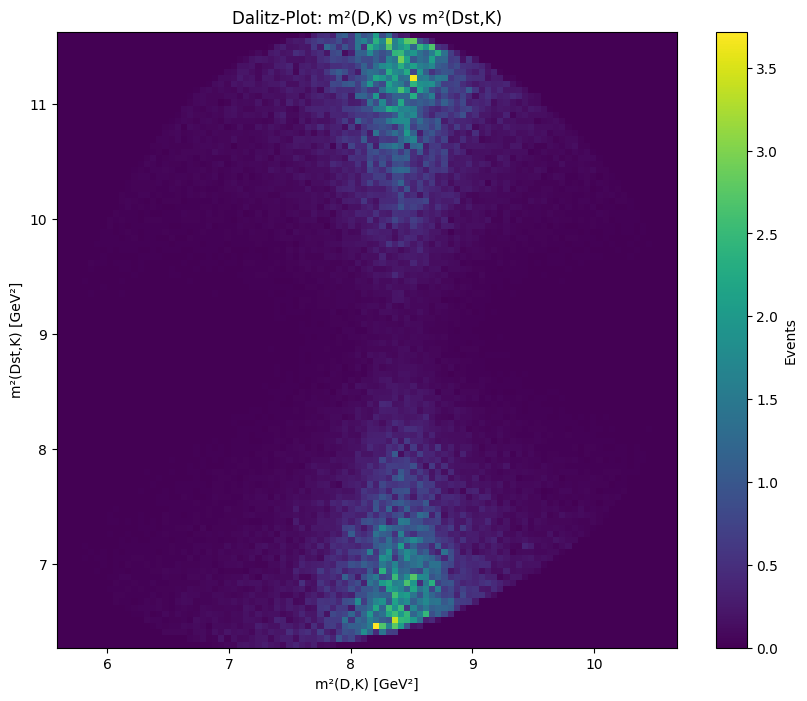

In [14]:
plt.figure(figsize=(10, 8))
plt.hist2d(m2_DK, m2_DstK, bins=100, weights=I, cmap='viridis')
plt.colorbar(label='Events')
plt.xlabel('m²(D,K) [GeV²]')
plt.ylabel('m²(Dst,K) [GeV²]')
plt.title('Dalitz-Plot: m²(D,K) vs m²(Dst,K)')
plt.show()

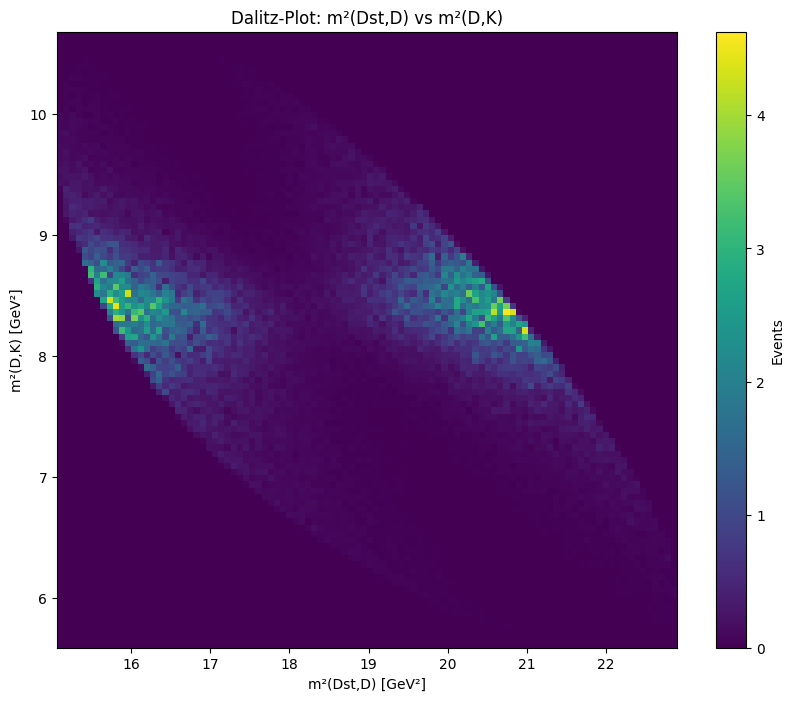

In [15]:
plt.figure(figsize=(10, 8))
plt.hist2d(m2_DstD, m2_DK, bins=100, weights=I, cmap='viridis')
plt.colorbar(label='Events')
plt.xlabel('m²(Dst,D) [GeV²]')
plt.ylabel('m²(D,K) [GeV²]')
plt.title('Dalitz-Plot: m²(Dst,D) vs m²(D,K)')
plt.show()

/tmp/ipykernel_1085541/1949326141.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("plasma", n_resonances)


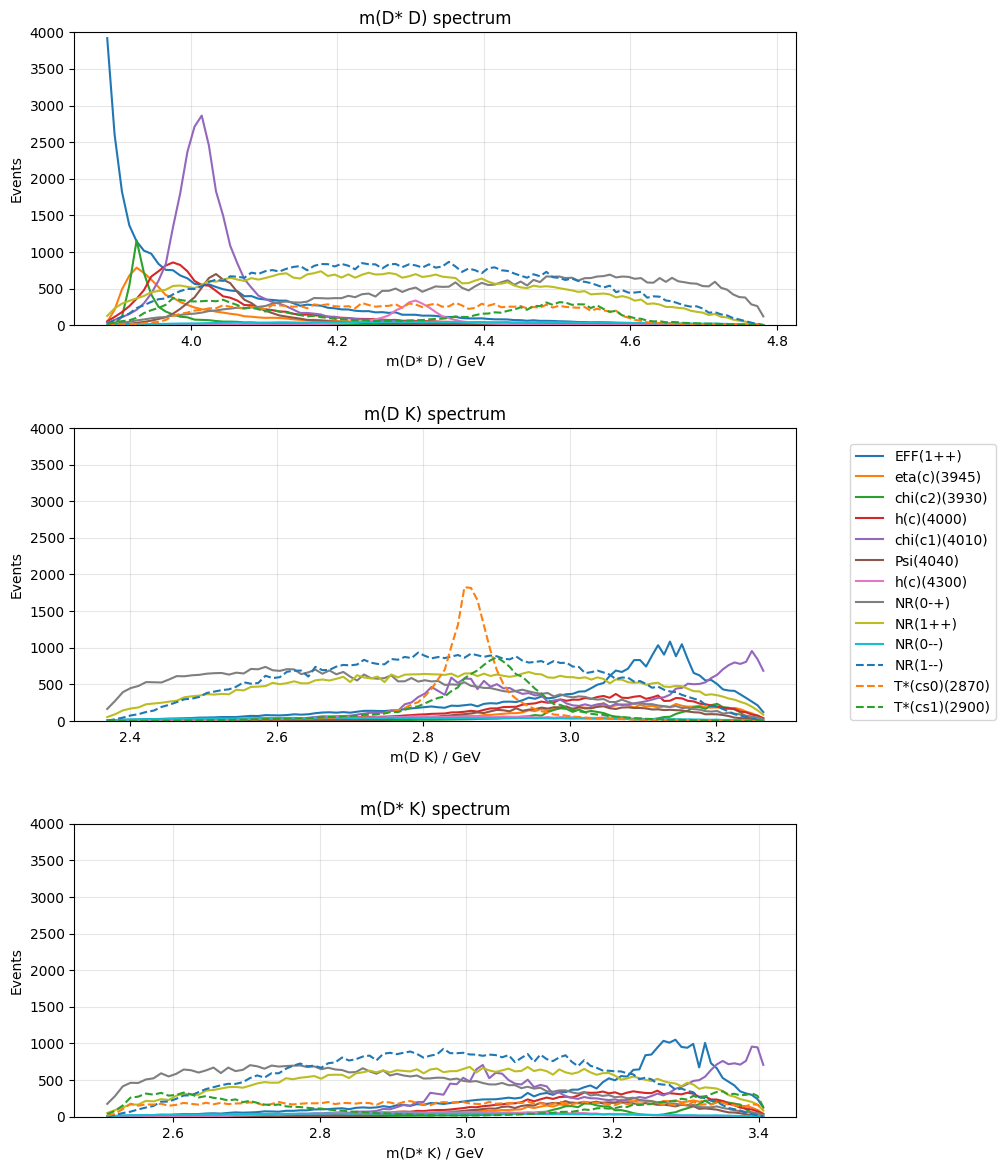

In [ ]:
# Plotting of all mass spectra

n_resonances = len(paper)
n_events = len(all_amps[0])

amps_array = np.zeros((n_resonances, n_events), dtype=np.complex128)

for i in paper:
    for j in range(n_events):
        re, im = all_amps[i][j]
        amps_array[paper.index(i), j] = re + 1j*im

weights = np.abs(amps_array)**2

lims = [4000, 4000, 4000]

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
plt.subplots_adjust(hspace=0)

cmap = plt.cm.get_cmap("plasma", n_resonances)
colors = [cmap(i) for i in range(n_resonances)]

handles, labels = [], []

All_Hist = []

for M in range(len(m)):
    ax = axes[M]
    Hist = []
    
    for res in range(len(weights)):
        hist, edges = np.histogram(m[M], bins=100, weights=weights[res])
        Hist.append(hist)
        bin_centers = np.sqrt(0.5*(edges[1:] + edges[:-1]))
        
        if res < 10:
            line = ax.plot(bin_centers, hist*10, label=res_names_paper[paper[res]])
            #if M == 0:
                #ax.fill_between(x_sorted[res], np.array(y_sorted[res])*100, alpha=0.4, color=line[0].get_color())
        else:
            line = ax.plot(bin_centers, hist*10, label=res_names_paper[paper[res]], linestyle="--")
            #if M == 0:
                #ax.fill_between(x_sorted[res], np.array(y_sorted[res])*100, alpha=0.4, color=line[0].get_color())
        
        if M == 0:
            handles.extend(line)
            labels.append(res_names_paper[paper[res]])

    res_sums = []
    for b in range(100):
        sum = 0
        for r in range(n_resonances):
            sum += Hist[r][b]
        
        res_sums.append(sum)

    All_Hist.append(Hist)

    ax.set_ylim(0, lims[M])
    ax.grid(alpha=0.3)
    ax.set_xlabel(f"{m_names[M]} / GeV")
    ax.set_ylabel("Events")
    ax.set_title(f"{m_names[M]} spectrum")
    ax.set_aspect(0.0001)

fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout(pad=0.5)
plt.show()

In [144]:
for i in range(13):
    print(dg.chains[i][0], f":   {bin_centers[np.argmax(Hist[i])]: .4} GeV   ", np.max(Hist[i]))

Bp->X(3872)+K :    3.294 GeV    124.87908887367874
Bp->X(3915)(0-)+K :    3.269 GeV    23.05596920186436
Bp->chi(c2)(3930)+K :    3.35 GeV    24.257807183459477
Bp->X(3940)(1+)+K :    3.203 GeV    36.37195959378807
Bp->X(3993)+K :    3.39 GeV    93.45537740845259
Bp->Psi(4040)+K :    3.17 GeV    21.470202734517336
Bp->X(4300)+K :    2.996 GeV    7.028499214254531
Bp->NR(0-)SPp+K :    2.773 GeV    70.85623161094853
Bp->NR(1+)PSp+K :    3.005 GeV    67.47139457029078
Bp->NR(0-)SPm+K :    2.859 GeV    4.399177068140433
Bp->NR(1-)PPm+K :    3.005 GeV    90.54080196144977
Bp->X0(2900)+Dst :    2.645 GeV    22.138491937514083
Bp->X1(2900)+Dst :    3.358 GeV    37.150850498015465


In [145]:
x_chi_c2_3930 = [3.9080197409006785, 3.9132942628007403, 3.916224552745219, 3.919154842689698, 3.9220851326341766, 3.9250154225786553, 3.9291178285009254, 3.9338062924120916, 3.9379086983343616, 3.9431832202344235, 3.9513880320789636, 3.9607649599012955]
y_chi_c2_3930 = [ 2.1761658, 4.50777202, 6.37305699, 8.08290155, 9.94818653, 10.56994819, 9.79274611, 7.92746114, 6.06217617, 4.50777202, 3.10880829, 2.02072539]

x_eta_c_3945 = [3.893368291178285, 3.8992288710672427, 3.904503392967304, 3.9103639728562616, 3.9168106107341147, 3.9250154225786553, 3.9338062924120916, 3.941425046267736, 3.9490438001233805, 3.957248611967921, 3.966625539790253, 3.9754164096236893, 3.9842072794571255, 3.9965144972239357, 4.007063541024059, 4.018198642813078, 4.029333744602098, 4.040468846391117]
y_eta_c_3945 = [1.2435233160621806, 2.487046632124361, 3.7305699481865275, 4.8186528497409284, 6.217616580310889, 6.839378238341965, 6.528497409326434, 5.906735751295344, 5.284974093264253, 4.663212435233163, 3.886010362694307, 3.4196891191709824, 2.953367875647672, 2.487046632124361, 2.3316062176165815, 2.0207253886010363, 1.8652849740932709, 1.5544041450777257]

x_psi_4040 = [3.966625539790253, 3.9754164096236893, 3.9836212214682294, 3.9912399753238743, 3.998272671190623, 4.005305367057372, 4.012338062924121, 4.019956816779765, 4.029919802590993, 4.040468846391117, 4.05101789019124, 4.060980876002468, 4.070943861813696, 4.08266502159161, 4.0949722393584205]
y_psi_4040 = [1.2435233160621806, 1.5544041450777257, 2.0207253886010363, 2.797927461139892, 3.4196891191709824, 4.352331606217618, 5.284974093264253, 6.373056994818654, 6.9948186528497445, 6.839378238341965, 6.062176165803109, 5.129533678756474, 4.352331606217618, 3.1088082901554372, 2.176165803108816]

x_chi_c1_4010 = [3.9343923504009872, 3.944355336212215, 3.9636952498457743, 3.9742442936458975, 3.9842072794571255, 3.9947563232572487, 4.005891425046268, 4.0152683528686, 4.025817396668723, 4.035194324491055, 4.045743368291179, 4.055706354102406, 4.065669339913634, 4.076804441702652, 4.08676742751388, 4.096730413325108, 4.1066933991363355, 4.117242442936459, 4.127205428747686, 4.137168414558914]
y_chi_c1_4010 = [2.176165803108816, 3.264248704663217, 7.15025906735751, 10.725388601036272, 16.32124352331607, 22.072538860103634, 26.891191709844563, 27.66839378238342, 24.09326424870467, 18.652849740932638, 13.678756476683944, 10.414507772020727, 8.082901554404145, 6.373056994818654, 5.129533678756474, 4.196891191709852, 3.575129533678762, 2.797927461139892, 2.3316062176165815, 2.0207253886010363]

x_h_c_4300 = [4.260240592227021, 4.277236273904997, 4.297162245527452, 4.312399753238742, 4.3229487970388645, 4.3329117828500925, 4.3446329426280075]
y_h_c_4300 = [0.9326424870466354, 2.0207253886010363, 4.041450777202073, 4.196891191709852, 3.264248704663217, 2.3316062176165815, 1.7098445595854912]

x_EFF_1pp = [3.872856261566934, 3.875200493522517, 3.8769586674892045, 3.880475015422579, 3.88164713140037, 3.8834053053670576, 3.884577421344849, 3.888679827267119, 3.8927822331893895, 3.896298581122764, 3.900400987045034, 3.904503392967304, 3.9086057988895746, 3.9127082048118447, 3.919154842689698, 3.927945712523134, 3.9355644663787785, 3.945527452190006, 3.9537322640345467, 3.962523133867983, 3.9695558297347318, 3.9789327575570637, 3.9877236273905, 3.9976866132017275, 4.022887106724244, 4.0328500925354716, 4.042227020357804, 4.053362122146823, 4.082078963602714, 4.094386181369525, 4.105521283158544, 4.1166563849475635, 4.130721776681061, 4.144787168414559, 4.157094386181369, 4.172331893892659, 4.189913633559531, 4.207495373226403, 4.22449105490438, 4.243244910549044, 4.2608266502159164, 4.278994447871684, 4.295404071560765, 4.310055521283158, 4.324120913016657, 4.33877236273905]
y_EFF_1pp = [3.264248704663217, 5.440414507772019, 7.7720207253886, 14.611398963730565, 16.78756476683938, 19.119170984455963, 21.450777202072544, 25.025906735751292, 23.782383419689126, 21.76165803108809, 19.585492227979273, 17.25388601036269, 15.07772020725389, 13.212435233160619, 11.658031088082907, 9.948186528497416, 9.01554404145078, 8.238341968911925, 8.082901554404145, 7.30569948186529, 6.9948186528497445, 6.683937823834199, 6.373056994818654, 5.906735751295344, 5.440414507772019, 5.284974093264253, 5.129533678756474, 4.8186528497409284, 4.196891191709852, 4.041450777202073, 3.886010362694307, 3.7305699481865275, 3.4196891191709824, 3.264248704663217, 3.264248704663217, 2.797927461139892, 2.797927461139892, 2.487046632124361, 2.487046632124361, 2.3316062176165815, 2.176165803108816, 1.8652849740932709, 2.0207253886010363, 1.8652849740932709, 1.5544041450777257, 1.398963730569946]

x_NR1mm = [4.073288093769278, 4.08266502159161, 4.0914558914250465, 4.100832819247378, 4.109623689080815, 4.1184145589142505, 4.127791486736583, 4.136582356570019, 4.145373226403454, 4.154750154225787, 4.164127082048118, 4.172331893892659, 4.181122763726095, 4.1904996915484265, 4.199876619370759, 4.208081431215299, 4.216872301048736, 4.226249228871067, 4.235040098704504, 4.244417026526835, 4.253207896360271, 4.261998766193708, 4.271375694016039, 4.280752621838372, 4.288957433682912, 4.297748303516348, 4.30712523133868, 4.315916101172116, 4.324706971005552, 4.334083898827884, 4.342288710672425, 4.351665638494756, 4.360456508328192, 4.368661320172733, 4.378038247995065, 4.387415175817397, 4.395619987661937, 4.4049969154842685, 4.414373843306601, 4.422578655151141, 4.431369524984578, 4.4401603948180135, 4.44895126465145, 4.457742134484886, 4.467705120296113, 4.47649599012955, 4.485286859962986, 4.494663787785318, 4.504040715607649, 4.513417643429982, 4.521622455274522, 4.530413325107958, 4.539204194941394, 4.54799506477483, 4.556785934608266, 4.565576804441703, 4.5743676742751385, 4.583158544108575, 4.592535471930907, 4.601912399753239, 4.610117211597779, 4.618908081431215, 4.628285009253547, 4.637075879086983, 4.64586674892042, 4.6546576187538555, 4.663448488587292, 4.672239358420728, 4.681030228254164, 4.690993214065392, 4.699784083898828, 4.709747069710056, 4.719710055521283, 4.729673041332511]
y_NR1mm = [7.92746113989638, 7.7720207253886, 7.7720207253886, 8.238341968911925, 8.238341968911925, 8.39378238341969, 8.860103626943001, 9.01554404145078, 9.170984455958546, 9.326424870466326, 9.326424870466326, 9.326424870466326, 10.103626943005182, 10.103626943005182, 9.792746113989637, 10.259067357512961, 10.103626943005182, 10.569948186528507, 10.569948186528507, 10.880829015544037, 11.036269430051817, 11.036269430051817, 10.880829015544037, 10.725388601036272, 10.725388601036272, 10.880829015544037, 11.036269430051817, 11.347150259067362, 11.347150259067362, 11.658031088082907, 11.191709844559583, 10.725388601036272, 10.725388601036272, 11.036269430051817, 11.036269430051817, 11.347150259067362, 11.347150259067362, 11.502590673575128, 11.036269430051817, 10.259067357512961, 10.259067357512961, 10.414507772020727, 10.259067357512961, 10.259067357512961, 10.569948186528507, 10.414507772020727, 9.948186528497416, 9.792746113989637, 9.948186528497416, 9.481865284974091, 9.01554404145078, 9.170984455958546, 9.326424870466326, 9.326424870466326, 9.01554404145078, 8.54922279792747, 8.238341968911925, 7.92746113989638, 7.7720207253886, 7.7720207253886, 7.30569948186529, 6.9948186528497445, 6.528497409326434, 6.683937823834199, 6.217616580310889, 5.906735751295344, 5.440414507772019, 4.8186528497409284, 4.5077720207253975, 3.886010362694307, 3.7305699481865275, 3.264248704663217, 2.953367875647672, 2.176165803108816]

x_NR1pp = [4.073874151758174, 4.092628007402838, 4.11020974706971, 4.1283775447254785, 4.14595928439235, 4.164127082048118, 4.182880937692782, 4.2004626773596545, 4.217458359037631, 4.235040098704504, 4.253207896360271, 4.271375694016039, 4.288957433682912, 4.30712523133868, 4.325879086983344, 4.344046884639112, 4.360456508328192, 4.379210363972856, 4.396792103639728, 4.414373843306601, 4.431955582973473, 4.4501233806292415, 4.467705120296113, 4.485872917951881, 4.503454657618754, 4.5222085132634176, 4.53979025293029, 4.556785934608266, 4.574953732264034, 4.592535471930907, 4.610117211597779, 4.628871067242443, 4.64586674892042, 4.664034546576188, 4.681030228254164, 4.698025909932141, 4.716193707587909, 4.734361505243677]
y_NR1pp = [6.9948186528497445, 7.15025906735751, 7.461139896373055, 7.616580310880835, 8.082901554404145, 8.082901554404145, 8.082901554404145, 8.39378238341969, 8.39378238341969, 8.704663212435236, 8.39378238341969, 8.860103626943001, 8.704663212435236, 9.326424870466326, 9.01554404145078, 8.860103626943001, 8.54922279792747, 8.860103626943001, 8.54922279792747, 8.704663212435236, 8.54922279792747, 8.704663212435236, 8.082901554404145, 7.92746113989638, 7.7720207253886, 7.30569948186529, 7.461139896373055, 6.9948186528497445, 6.373056994818654, 5.751295336787564, 5.440414507772019, 4.974093264248708, 4.663212435233163, 3.886010362694307, 3.264248704663217, 2.953367875647672, 2.176165803108816, 1.398963730569946]

x_NR0mp = [4.113140037014189, 4.130721776681061, 4.150061690314621, 4.167643429981493, 4.18463911165947, 4.202806909315237, 4.22038864898211, 4.2373843306600865, 4.25613818630475, 4.274892041949414, 4.291887723627391, 4.3094694632942625, 4.327051202961135, 4.345219000616903, 4.363386798272671, 4.381554595928439, 4.398550277606416, 4.4167180752621835, 4.434299814929056, 4.452467612584824, 4.469463294262801, 4.488217149907465, 4.505798889574336, 4.523380629241209, 4.542134484885873, 4.5591301665638495, 4.577297964219618, 4.594293645897594, 4.612461443553362, 4.630043183220234, 4.647624922887107, 4.665792720542875, 4.683374460209747, 4.700956199876619, 4.719123997532387, 4.737291795188155, 4.753115360888341]
y_NR0mp = [3.1088082901554372, 3.575129533678762, 3.575129533678762, 3.886010362694307, 4.196891191709852, 4.352331606217618, 4.663212435233163, 4.974093264248708, 5.284974093264253, 5.440414507772019, 5.906735751295344, 6.528497409326434, 6.683937823834199, 6.683937823834199, 6.9948186528497445, 7.30569948186529, 7.92746113989638, 8.39378238341969, 8.39378238341969, 8.704663212435236, 9.01554404145078, 9.481865284974091, 9.637305699481871, 9.637305699481871, 10.103626943005182, 10.259067357512961, 10.259067357512961, 10.414507772020727, 10.259067357512961, 9.948186528497416, 10.880829015544037, 10.103626943005182, 9.948186528497416, 9.326424870466326, 8.704663212435236, 8.082901554404145, 6.683937823834199]

x_h_c_4000 = [3.9150524367674278, 3.9238433066008636, 3.9338062924120916, 3.9513880320789636, 3.9631091918568786, 3.973658235657002, 3.9883096853793956, 4.004133251079581, 4.022301048735349, 4.039296730413325, 4.05512029611351, 4.070357803824799]
y_h_c_4000 = [1.5544041450777257, 2.487046632124361, 3.575129533678762, 6.217616580310889, 6.9948186528497445, 7.616580310880835, 7.30569948186529, 6.373056994818654, 5.440414507772019, 4.352331606217618, 3.7305699481865275, 3.264248704663217]

x_T_cs1 = [3.9009870450339297, 3.8810610734114745, 3.9226711906230722, 3.9420111042566317, 3.961937075879087, 3.982449105490438, 4.002375077112894, 4.022301048735349, 4.042227020357804, 4.06332510795805, 4.0832510795805055, 4.103763109191857, 4.123689080814312, 4.143615052436767, 4.164127082048118, 4.18463911165947, 4.203979025293029, 4.225077112893276, 4.244417026526835, 4.265515114127082, 4.285441085749538, 4.305367057371993, 4.326465144972239, 4.347563232572486, 4.36631708821715, 4.388587291795188, 4.407341147439852, 4.4284392350400985, 4.449537322640346, 4.467705120296113, 4.487631091918569, 4.509315237507711, 4.527483035163479, 4.548581122763726, 4.568507094386181, 4.589019123997533, 4.6077729796421965, 4.628871067242443, 4.648210980876002, 4.67048118445404, 4.689235040098705, 4.710333127698951, 4.729673041332511, 4.749599012954966]
y_T_cs1 = [0.6217616580310881, 0.31088082901554404, 1.088082901554404, 1.8652849740932642, 2.7979274611398965, 4.041450777202073, 4.196891191709844, 4.196891191709844, 3.5751295336787563, 3.2642487046632125, 2.7979274611398965, 2.33160621761658, 2.176165803108808, 1.8652849740932642, 1.3989637305699483, 1.088082901554404, 1.088082901554404, 0.9326424870466321, 0.9326424870466321, 0.9326424870466321, 0.7772020725388601, 0.7772020725388601, 0.7772020725388601, 1.088082901554404, 1.2435233160621761, 1.5544041450777202, 1.8652849740932642, 2.33160621761658, 2.9533678756476682, 3.1088082901554404, 3.8860103626943006, 4.66321243523316, 4.196891191709844, 3.7305699481865284, 3.1088082901554404, 2.176165803108808, 1.3989637305699483, 0.9326424870466321, 1.088082901554404, 0.7772020725388601, 0.6217616580310881, 0.31088082901554404, 0.46632124352331605, 0.46632124352331605]

x_T_cs0 = [3.9472856261566935, 3.961937075879087, 3.9830351634793337, 4.002961135101789, 4.022301048735349, 4.0428130783467, 4.0680135718692165, 4.099660703269587, 4.124275138803208, 4.144787168414559, 4.164713140037014, 4.1852251696483656, 4.205151141270821, 4.2256631708821715, 4.245589142504627, 4.265515114127082, 4.286027143738433, 4.306539173349784, 4.326465144972239, 4.345219000616903, 4.366903146206045, 4.388001233806293, 4.407341147439852, 4.4284392350400985, 4.447779148673658, 4.468877236273905, 4.4888032078963604, 4.508729179518816, 4.529241209130166, 4.5491671807526215, 4.569093152375077, 4.589019123997533, 4.608359037631092, 4.628871067242443, 4.649969154842689]
y_T_cs0 = [0.46632124352331605, 0.9326424870466321, 1.709844559585492, 2.6424870466321244, 2.4870466321243523, 2.4870466321243523, 2.33160621761658, 3.2642487046632125, 3.7305699481865284, 3.2642487046632125, 3.1088082901554404, 2.9533678756476682, 2.9533678756476682, 3.1088082901554404, 3.2642487046632125, 3.419689119170984, 3.419689119170984, 3.1088082901554404, 3.2642487046632125, 3.419689119170984, 3.419689119170984, 3.419689119170984, 3.419689119170984, 3.419689119170984, 3.8860103626943006, 3.419689119170984, 3.5751295336787563, 3.5751295336787563, 3.2642487046632125, 3.2642487046632125, 2.7979274611398965, 2.0207253886010363, 1.2435233160621761, 0.7772020725388601, 0.7772020725388601]

x_DstD_digit = [x_chi_c2_3930, x_eta_c_3945, x_psi_4040, x_chi_c1_4010, x_h_c_4300, x_EFF_1pp, x_NR1mm, x_NR1pp, x_NR0mp]
y_DstD_digit = [y_chi_c2_3930, y_eta_c_3945, y_psi_4040, y_chi_c1_4010, y_h_c_4300, y_EFF_1pp, y_NR1mm, y_NR1pp, y_NR0mp]

x_sorted = [x_EFF_1pp, x_eta_c_3945, x_chi_c2_3930, x_h_c_4000, x_chi_c1_4010, x_psi_4040, x_h_c_4300, x_NR0mp, x_NR1pp, [4], x_NR1mm, x_T_cs0, x_T_cs1]
y_sorted = [y_EFF_1pp, y_eta_c_3945, y_chi_c2_3930, y_h_c_4000, y_chi_c1_4010, y_psi_4040, y_h_c_4300, y_NR0mp, y_NR1pp, [0], y_NR1mm, y_T_cs0, y_T_cs1]

In [146]:
print(res_names_paper)
print(res_names)

['EFF(1++)', 'eta(c)(3945)', 'chi(c2)(3930)', 'h(c)(4000)', 'chi(c1)(4010)', 'Psi(4040)', 'h(c)(4300)', 'NR(0-+)', 'NR(1++)', 'NR(0--)', 'NR(1--)', 'T*(cs0)(2870)', 'T*(cs1)(2900)']
['X(3872)', 'X(3915)(0-)', 'chi(c2)(3930)', 'X(3940)(1+)', 'X(3993)', 'Psi(4040)', 'X(4300)', 'NR(0-)SPp', 'NR(1+)PSp', 'NR(0-)SPm', 'NR(1-)PPm', 'X0(2900)', 'X1(2900)']


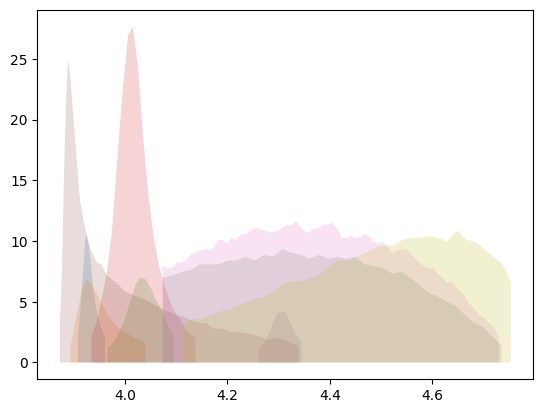

In [147]:
for i in range(len(x_DstD_digit)):
    plt.fill_between(x_DstD_digit[i], y_DstD_digit[i], alpha=0.2)

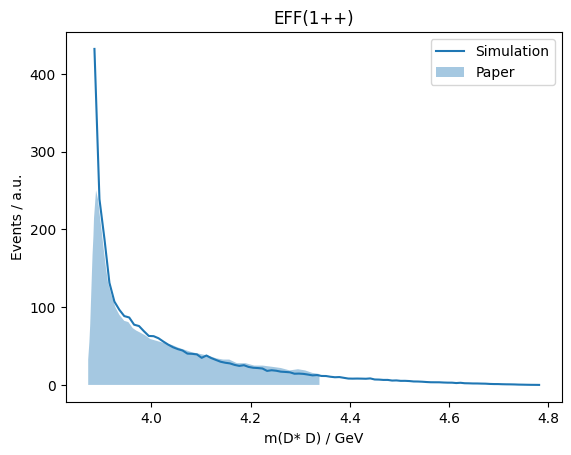

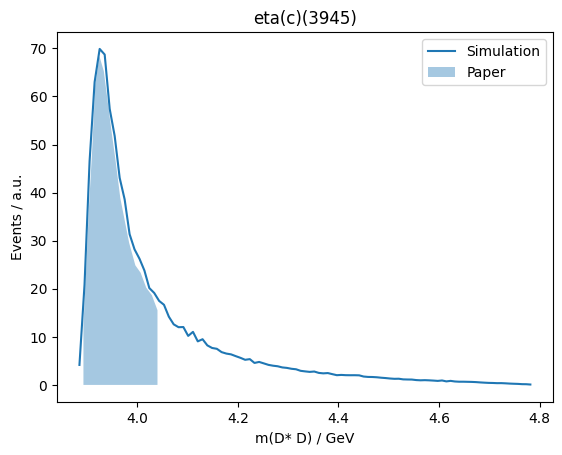

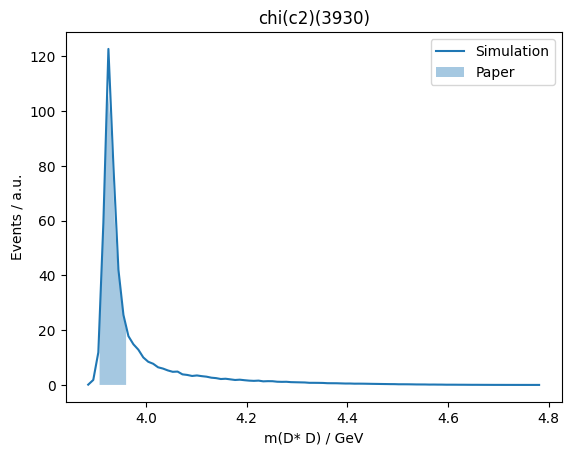

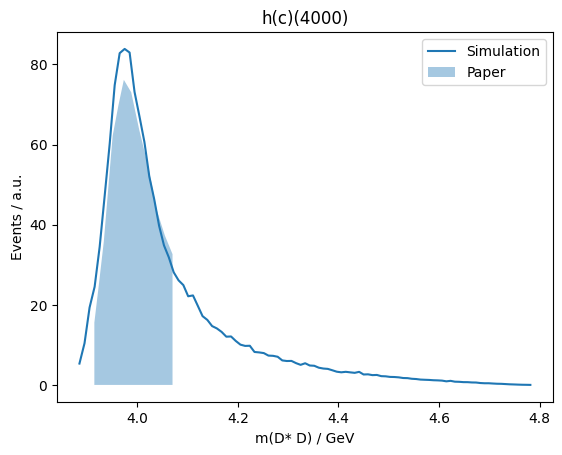

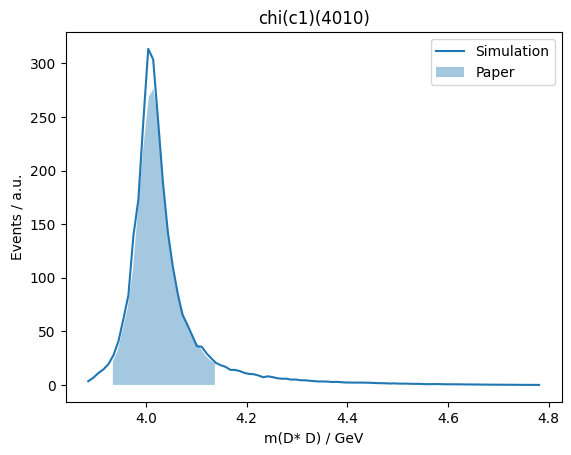

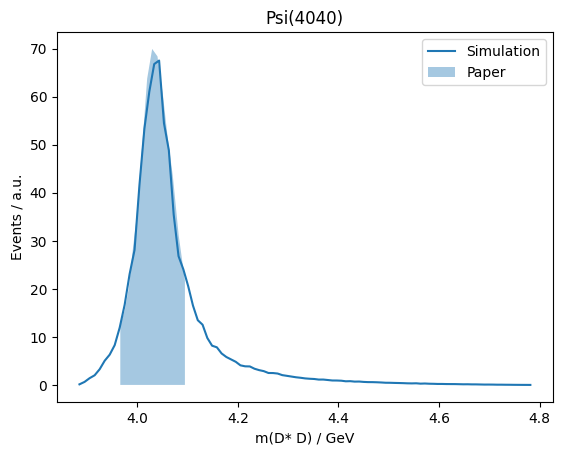

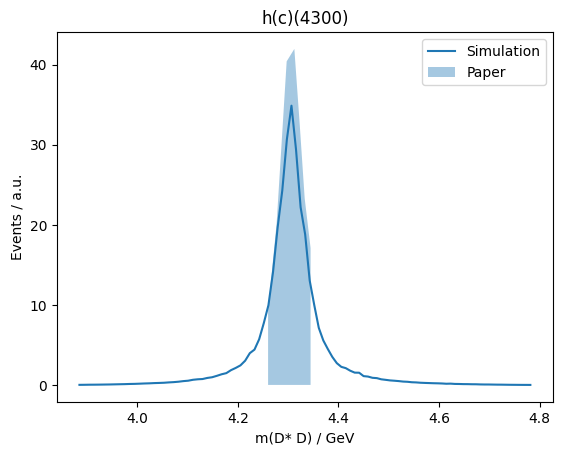

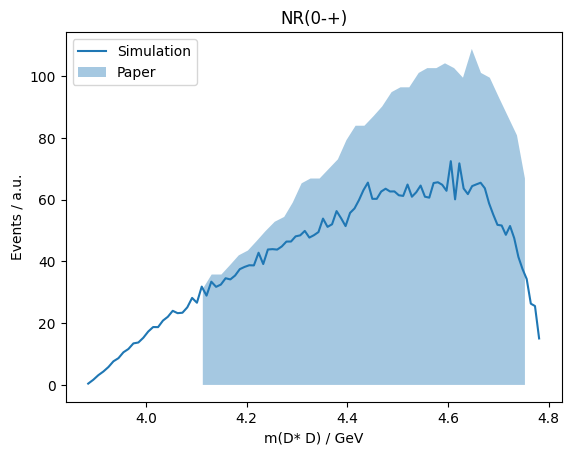

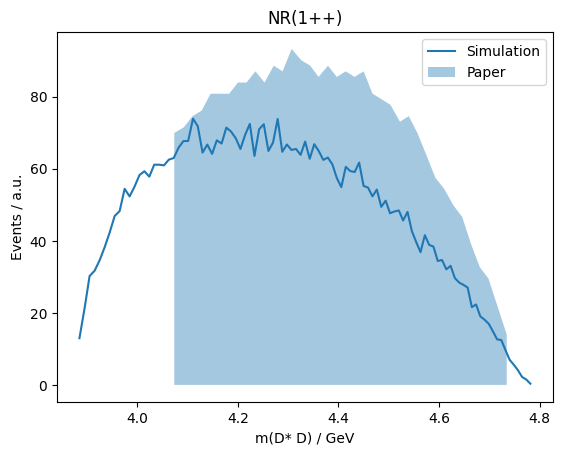

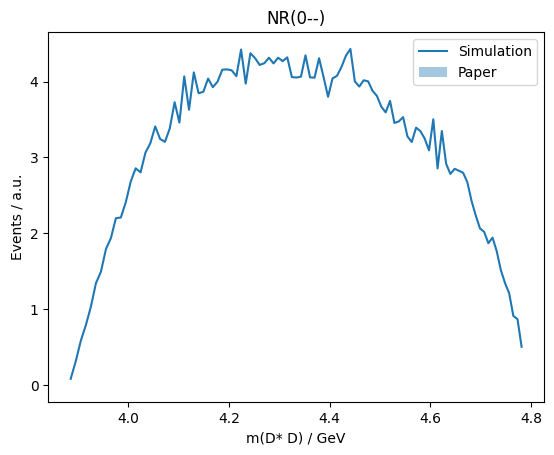

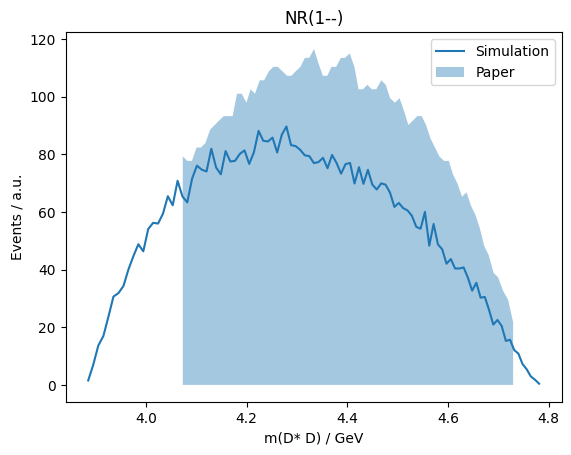

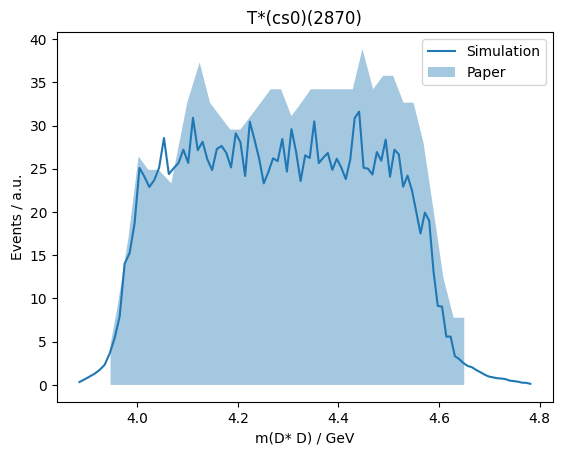

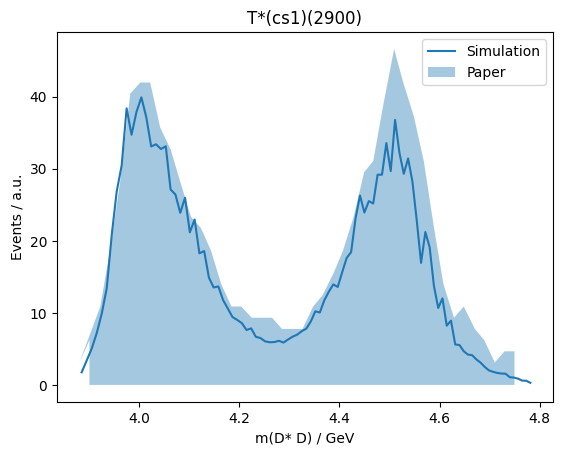

In [160]:
M = 0
for res in range(len(weights)):
    hist, edges = np.histogram(m[M], bins=100, weights=weights[res])
    bin_centers = np.sqrt(0.5*(edges[1:] + edges[:-1]))

    plt.plot(bin_centers, hist, label="Simulation")
    plt.fill_between(x_sorted[res], np.array(y_sorted[res])*10, alpha=0.4, label="Paper")
    plt.legend()
    plt.xlabel(f"{m_names[M]} / GeV")
    plt.ylabel("Events / a.u.")
    plt.title(res_names_paper[paper[res]])
    plt.show()

### Reconfiguring final_params.json and simulating

In [ ]:
res_names = ["X(3872)","X(3915)(0-)","chi(c2)(3930)","X(3940)(1+)","X(3993)","Psi(4040)","X(4300)","NR(0-)SPp","NR(1+)PSp","NR(0-)SPm","NR(1-)PPm","X0(2900)","X1(2900)"]

con_one = ConfigLoader("config_a.yml")
con_one.set_params("final_params.json")
p4_one = con_one.generate_phsp_p(10)
data_one = con_one.data.cal_angle(p4_one)
data_one["c"] = np.ones((10,))

all_amps_one = []

for i in range(len(res_names)):
    Resonance = res_names[i]

    with open("final_params.json", "r") as f:
        params = json.load(f)

    for key in list(params.get("value", {}).keys()):
        ks = str(key)
        if ks.endswith(('r', 'i')):
            if ks.endswith('r') and Resonance in ks:
                params["value"][key] = 1.0
            else:
                params["value"][key] = 0.0

    with open("final_params.json", "w") as fw:
        json.dump(params, fw, indent=2)

    amp_model_one = con_one.get_amplitude()
    dg_one = amp_model_one.decay_group
    #dg_one.set_used_chains([i])
    amps_one = dg_one.get_amp(data_one).numpy().flatten()
    all_amps_one.append(amps_one)


In [16]:
print(sum(all_amps_one))

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [13]:
print(len(res_names))
print(len(all_amps_one))

13
13
